In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from IPython.display import Audio
import librosa
from librosa import display
import numpy as np
import scipy
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
BASE_DIR='/content/drive/MyDrive/IIT_Guwahati/IITG_DigitalSignalProcessorsLab/Music_classification_by_Genre/'

y, sr = librosa.load(BASE_DIR+'wav_files/1899_Rhythm_blues.wav', sr = 22050) # Use the default sampling rate of 22,050 Hz

In [ ]:
Audio(y, rate = sr)

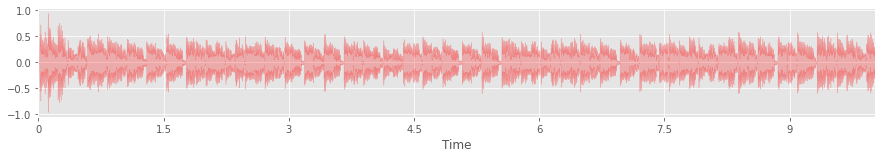

In [ ]:
plt.figure(figsize=(15,2))
librosa.display.waveplot(y  = y,  #Plot the amplitude envelope of a waveform
                     sr     = sr, 
                     max_sr = 1000, 
                     alpha  = 0.25, 
                     color  = 'red')

### Part I: Time Domain Features

1) Statistical moments calculated on the raw audio

In [ ]:
print('Signal mean = {:.2f}'.format(np.mean(abs(y))))
print('Signal std dev = {:.2f}'.format(np.std(y)))
print('Signal skewness = {:.2f}'.format(scipy.stats.skew(abs(y))))
print('Signal kurtosis = {:.2f}'.format(scipy.stats.kurtosis(y)))

Signal mean = 0.11
Signal std dev = 0.14
Signal skewness = 0.98
Signal kurtosis = 0.14


2) Zero crossing rate

ZCR mean = 0.12
ZCR std dev = 0.04


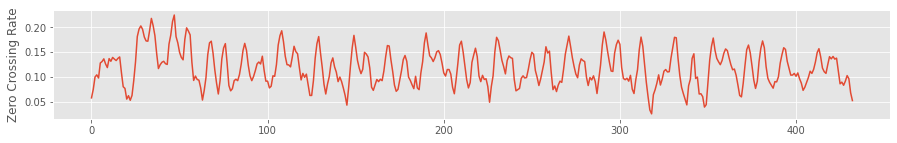

In [ ]:
# Add a small constant before computing the zero crossing rate to disregard unwanted silence 'noise'
zcr = librosa.feature.zero_crossing_rate(y + 0.0001, frame_length=2048, hop_length=512)[0]
plt.figure(figsize=(15,2))
plt.plot(zcr)
plt.ylabel('Zero Crossing Rate')
print('ZCR mean = {:.2f}'.format(np.mean(zcr)))
print('ZCR std dev = {:.2f}'.format(np.std(zcr)))

3) Root Mean Squared Value

RMS mean = 0.14
RMS std dev = 0.02


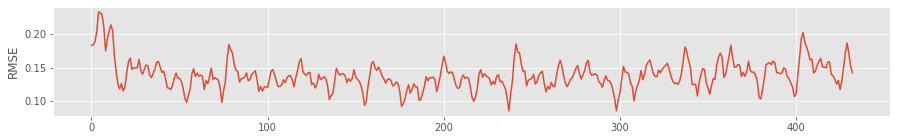

In [ ]:
rmse = librosa.feature.rms(y + 0.0001)[0]
plt.figure(figsize=(15,2))
plt.plot(rmse)
plt.ylabel('RMSE')
print('RMS mean = {:.2f}'.format(np.mean(rmse)))
print('RMS std dev = {:.2f}'.format(np.std(rmse)))

### Part II: Spectral Features

1) Spectral Contrast: considers the spectral peak, the spectral valley, and their difference in each frequency subband. Usually, 6 sub-bands

Means [14.95131351 13.38882927 15.54323631 15.67537086 16.51617064 16.09752107
 33.22424009]
Std devs [4.42676134 4.18455889 3.83673452 2.86484591 2.48356838 2.10011131
 2.54622711]


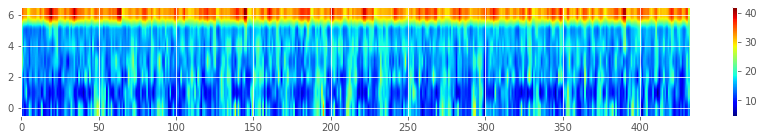

In [ ]:
# Frequency cutoff for the first bin `[0, fmin]`
# Subsequent bins will cover `[fmin, 2*fmin]`, `[2*fmin, 4*fmin]
# Bins :  log scale
spectral_contrast = librosa.feature.spectral_contrast(y, sr=sr, n_bands = 6, fmin = 200.0)
plt.figure(figsize=(15,2))
plt.imshow(spectral_contrast, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(spectral_contrast, axis=1)) # Values are on dB scale
print('Std devs', np.std(spectral_contrast, axis=1)) 

2) Mel-Frequency Cepstral Coefficients

Means [-4.2894039e+01  7.4994934e+01 -3.8213277e+00  1.6049553e+01
  2.0995734e+00  1.5122087e+01  1.7934833e+00  8.4396133e+00
  4.7932614e-02  1.1443457e+01  2.1242609e+00  7.6861477e+00
 -2.0458958e+00  4.0540056e+00 -2.4683912e+00  4.2300682e+00
 -2.1644845e+00  2.9762745e+00  6.2736076e-01  1.7877488e+00]
Std devs [35.061306  13.2099905 14.5546255 10.944777   5.9707193  7.7776074
  6.207355   6.3251615  5.7192545  6.846171   6.2784142  5.912835
  4.7761226  4.922223   4.4748416  5.3892074  5.0557365  4.5763736
  6.244865   6.587725 ]


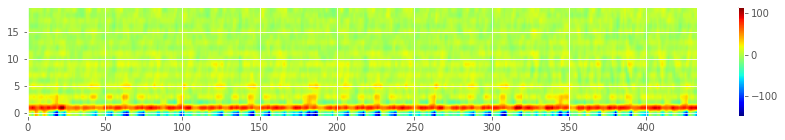

In [ ]:
mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)
plt.figure(figsize=(15,2))
plt.imshow(mfccs, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(mfccs, axis=1)) 
print('Std devs', np.std(mfccs, axis=1)) 

In [ ]:
import os
import numpy as np
import pandas as pd
import scipy
import librosa
from tqdm import tqdm

In [ ]:
WAV_DIR = '/content/drive/MyDrive/IIT_Guwahati/IITG_DigitalSignalProcessorsLab/Music_classification_by_Genre/wav_files/'
wav_files = os.listdir(WAV_DIR)#[:10]

In [ ]:
col_names = ['file_name', 'signal_mean', 'signal_std', 'signal_skew', 'signal_kurtosis', 
             'zcr_mean', 'zcr_std', 'rmse_mean', 'rmse_std'] + \
            ['spectral_contrast_' + str(i+1) + '_mean' for i in range(7)] + \
            ['spectral_contrast_' + str(i+1) + '_std' for i in range(7)] + \
            ['mfccs_' + str(i+1) + '_mean' for i in range(20)] + \
            ['mfccs_' + str(i+1) + '_std' for i in range(20)]

In [15]:
df = pd.DataFrame(columns=col_names)
for f in tqdm(wav_files):
    try:
        # Read wav-file
        y, sr = librosa.load(WAV_DIR+f, sr = 22050)
        feature_list = [f]

        feature_list.append(np.mean(abs(y)))
        feature_list.append(np.std(y))
        feature_list.append(scipy.stats.skew(abs(y)))
        feature_list.append(scipy.stats.kurtosis(y))
        
        zcr = librosa.feature.zero_crossing_rate(y + 0.0001, frame_length=2048, hop_length=512)[0]
        feature_list.append(np.mean(zcr))
        feature_list.append(np.std(zcr))

        rmse = librosa.feature.rms(y + 0.0001)[0]
        feature_list.append(np.mean(rmse))
        feature_list.append(np.std(rmse))

        spectral_contrast = librosa.feature.spectral_contrast(y, sr=sr, n_bands = 6, fmin = 200.0)
        feature_list.extend(np.mean(spectral_contrast, axis=1))
        feature_list.extend(np.std(spectral_contrast, axis=1))

        mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)
        feature_list.extend(np.mean(mfccs, axis=1))
        feature_list.extend(np.std(mfccs, axis=1))

        feature_list[1:] = np.round(feature_list[1:], decimals=3)
        
    except:
        pass
    x=pd.DataFrame([feature_list], columns=col_names)
    df = df.append(x, ignore_index=True)

# Save file
df.to_csv(BASE_DIR+'df_features.csv', index=False)

100%|██████████| 1533/1533 [18:48<00:00,  1.36it/s]
